In [46]:
# load the json
import json
import matplotlib.pyplot as plt
import numpy as np

with open('datacenter_emissions.json') as f:
    data = json.load(f)

data

{'Crusoe Ireland': [{'time_utc': '2026-02-21 22:00 UTC', 'co2_emission': 4.0},
  {'time_utc': '2026-02-21 23:00 UTC', 'co2_emission': 4.1},
  {'time_utc': '2026-02-22 00:00 UTC', 'co2_emission': 3.9},
  {'time_utc': '2026-02-22 01:00 UTC', 'co2_emission': 4.1},
  {'time_utc': '2026-02-22 02:00 UTC', 'co2_emission': 3.9},
  {'time_utc': '2026-02-22 03:00 UTC', 'co2_emission': 4.2},
  {'time_utc': '2026-02-22 04:00 UTC', 'co2_emission': 4.4},
  {'time_utc': '2026-02-22 05:00 UTC', 'co2_emission': 4.6},
  {'time_utc': '2026-02-22 06:00 UTC', 'co2_emission': 4.8},
  {'time_utc': '2026-02-22 07:00 UTC', 'co2_emission': 5.0},
  {'time_utc': '2026-02-22 08:00 UTC', 'co2_emission': 4.6},
  {'time_utc': '2026-02-22 09:00 UTC', 'co2_emission': 2.8},
  {'time_utc': '2026-02-22 10:00 UTC', 'co2_emission': 2.5},
  {'time_utc': '2026-02-22 11:00 UTC', 'co2_emission': 2.0},
  {'time_utc': '2026-02-22 12:00 UTC', 'co2_emission': 0.4},
  {'time_utc': '2026-02-22 13:00 UTC', 'co2_emission': 0.5},
  {'ti

In [47]:
# plot a heatmap of the emissions by datacenter, on a horizontal bar chart
datacenters = [d for d in data.keys()]

emissions = np.array([
    [item['co2_emission'] for item in data[datacenter]]
    for datacenter in datacenters
])
time = np.array([item['time_utc'] for item in data[datacenters[0]]])

emissions


array([[4. , 4.1, 3.9, 4.1, 3.9, 4.2, 4.4, 4.6, 4.8, 5. , 4.6, 2.8, 2.5,
        2. , 0.4, 0.5, 0. , 0.8, 3.4, 4.2, 4.2, 4.2, 4.5, 4.7, 4.7, 4.7,
        5. , 5. , 5. , 5. , 5. , 5. , 5. , 3. , 1.6, 0.7, 0.2, 0.1, 0.3,
        0.8, 1.8, 3.5, 5. , 5. , 5. , 5. , 5. , 5. , 5. , 5. , 5. , 5. ,
        5. , 5. , 5. , 5. , 5. , 4.7, 5. , 4.9, 4.8, 4.6, 4.5, 4.7, 4.9,
        5. , 4.9, 5. , 5. , 5. , 5. , 5. , 5. , 5. , 5. , 5. , 5. , 5. ,
        5. , 5. , 5. , 4.8, 4.5, 4.1, 3.1, 1.9, 1. , 0.7, 0.7, 1.7, 4.5,
        5. , 5. , 5. , 5. , 5. , 5. , 5. , 5. , 5. , 5. , 5. , 5. , 5. ,
        5. , 5. , 4.8, 4.8, 4.7, 4.7, 4.6, 4.5, 4.5, 4.4, 4.4, 4.3, 4.4,
        4.4, 4.4, 4.4, 4.4, 4.3, 4.2, 4.1, 3.9, 3.9, 4. , 4.2, 4.3, 4.4,
        4.5, 4.6, 4.6, 4.7, 4.7, 4.7, 5. , 5. , 5. , 5. , 5. , 5. , 5. ,
        5. , 5. , 5. , 5. , 5. , 5. , 4.7, 4.6, 4.5, 4.4, 4.4, 4.5, 4.5,
        4.5, 4.5, 4.4, 4.3, 4.1, 3.9, 3.7, 3.5, 3.5, 3.4, 3.4, 3.5],
       [1.7, 3. , 2.1, 2.2, 1.7, 1.6, 3. , 3.2, 2.3, 2.

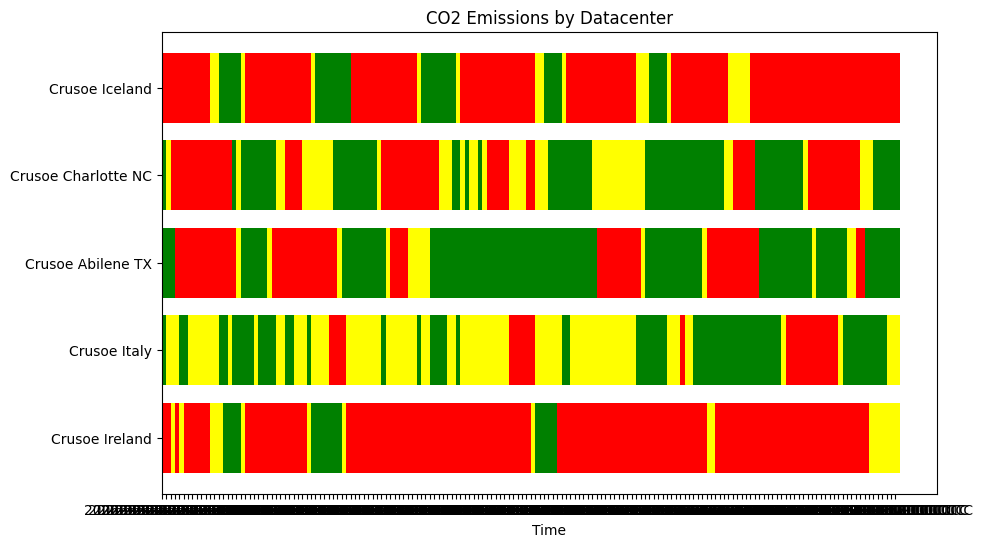

In [ ]:
# plot the data
# for each datacenter, plot the emissions as a horizontal bar chart. the x axis is the time, while the emissions are displayed as a color on the bar. the color should be green for low emissions, yellow for medium emissions, and red for high emissions. the y axis should be the datacenter name.
fig, ax = plt.subplots(figsize=(10, 6))

max_emission = np.max(emissions)
min_emission = np.min(emissions)

is_green = emissions < 2
is_red = emissions >= 4

for i, datacenter in enumerate(datacenters):
    for j, time_point in enumerate(time):
        # time_point = time_point.split('T')[1].split(':')[0]  # get the hour
        if is_green[i, j]:
            color = 'green'
        elif is_red[i, j]:
            color = 'red'
        else:
            color = 'yellow'
        ax.barh(datacenter, 1, left=time_point, color=color)

ax.set_xlabel('Time')
ax.set_title('CO2 Emissions by Datacenter')
ax.set_xticklabels(time, rotation=90)
plt.show()